## Análise do Modelo Novo Keynesiano com rigidez de preços usando o Dynare

Primeiro se propõe um modelo para o comportamento da economia. A base desse modelo é uma função de utilidade e uma função de restrição. As variáveis são escritas no formato de índice para que seja possível trabalhar a economia de forma agregada e criar a idéia de rigidez de preços. Não é intúito desse trabalho mostrar todas as derivações do modelo, o que é necessário saber é que se trata de um modelo para economia fechada, sem governo, com monopólio e rigidez de preços. Cada firma ira produzir uma determinada mercadoria (i). Essa simples manipulação em relação aos modelos classicos permite criar a idéia de monopólio na economia. Também é utilizado o coeficiênte de Calvo para inserir no modelo a idéia rigidez de preços. Os demais detalhes serão suprimidos já que o foco aqui é a utilização do Dynare e a análise dos resultados.

O Dynare exige um certo tipo de nomeclatura diferente daquela apresentada nas comdições de primeira ordem do modelo.Se estivermos trabalhando com um modelo onde os preços sejam rígidos a variável preço no tempo t deve ser reescrita com umade fazegem, ou seja: $P_{t}$ --> $P_{t-1}$. Dessa forma, o Dynare irá entender que a variável se trata de uma variável de estado.

O Dynare funciona através da leitura de um arquivo tipo '.mod', independente da linguagem que estivermos utilizando (matlab ou octave). Esse tipo de arquivo foi densenvolvido inicialmente para armazenar arquivos de  audio, portanto,muitos leitores o reconhecem como tal. No arquivo '.mod' toda entrada deve ser seguida de ponto evírgola. Primeiro se declaram as variáveis do modelo, depois as variáveis exogenas ($\cong$choques), os parâmetros e seus valores e ,por fim, os modelos em si.

O Dynare interpreta todas asvariáveis como sendo logarítimicas, após isso ele se encarrega de transformar as mesmas em desvios log-linearizados.

O Dynare tenta resolver o sistema de equações usando procedimentos numéricos. Em outras palavras, ele irá fazer 'chutes' para as variáveis até encontrar aquele valor que resolve o sistema de equações. Podemos dar ao dynare uma referencia por onde começar, o que não foi realizado nesse caso. 

|Equação do modelo DSGE|Representaçao no Dynare|
|:----------------------|:-----------------------|
|$A_{t}$|$exp(A)$|
|$A_{t+1}$|$exp(A(+1))$|
|$A_{t-1}$|$exp(A(-1))$|
|$K_{t+1}=a_{t}*K_{t}^a$|$exp(A(+1))=exp(a)*exp(K)$|

## Variáveis do modelo

|Variável|descrição|
|:---|:---|
|pi |Inflação|
|x |Gap do produto|
|ynat |Produto natural|
|y |produto|
|rnat |Taxa de juros natural|
|r |Taxa de juros real|
|i |Taxa de juros nominal|
|l |Horas trabalhadas|
|mg |Crescimento monetário|
|m |Choque de política monetária [processo AR(1)]|
|a |Choque tecnológico [processo AR(1)]|
|rano |Taxa de juros real anualizada|
|iano |Taxa de juros nominal anualizada|
|rnatano |Taxa de juros natural anualizada|
|piano; |Taxa de inflação anualizada|
|varexo epsilona |Choque exógeno de tecnologia|
|epsilonm |Choque exógena de política monetária|


## Parâmetros

|Variável|descrição|
|:---|:---|
|alpha |Capital share|
|beta | Fator de desconto
|rhoa | Fator autorregressivo do choque tecnológico|
|rhom | Fator autorregressivo do choque de p. monetária|
|sigma | Log utilidade|
|phi | Elasticidade Frisch da oferta de trabalho|
|phi_pi | Peso da inflação na Regra de Taylor|
|phi_y | peso do produto na Regra de Taylor|
|etah | Semi elasticidade da demanda por moeda|
|epsilon | Elasticidade da demanda|
|theta | Parâmetro de Calvo: prob. de otimização de preços|
|omega | Parâmetro composto|
|psi | Parâmetro composto|
|lambda | Parâmetro composto|
|kapa | Parâmetro composto|


## Parâmetros fixos

|Variável|descrição|
|:---|:---|
|alpha | 1/3|
|beta | 0.88|
|rhoa | 0.9|
|rhom | 0.5|
|sigma | 1|
|phi | 1|
|phi_pi | 1.5|
|phi_y | 0.125|
|etah | 4|
|epsilon | 6|
|theta | 0.1 ou 0.9|

## Parâmetros compostos

|Variável|Descrição.......................................................|
|:---|:---|
|omega | $\dfrac{1-alpha)}{[(1-alpha)+(alpha*epsilon)]}$|
|psi| $\dfrac{(1+phi)}{(sigma*(1-alpha)+phi+alpha)}$|
|lambda|$\dfrac{(1-theta)*(1-beta*theta)}{theta*omega}$|
|kapa|$lambda*\left[sigma+\dfrac{(phi+alpha)}{(1-alpha)}\right]$|

## Equações

|Variável|Descrição.......................................................|
|:---|:---|
|Curva de Phillips Novo Keynesiana|$pi=beta*pi(+1)+kapa*x$|
|Curva IS dinâmica|x=$\dfrac{-1}{sigma}*(i-pi(+1)-rnat)+x(+1)$|
|Regra de Taylor|$i=phi_pi*pi+phi_y*x+m$|
|Taxa de juros natural|$rnat=sigma*psi*(a(+1)-a)$|
|Taxa de juros real|$r=i-pi(+1)$|
|Produto natural|$ynat=psi*a$|
|Gap do produto|$x=y-ynat$|
|função de produção|$y=a+(1-alpha)*l$|
|Crescimento da oferta de moeda|$mg=4*(y-y_{t-1}-etah*(i-i_{t-1})+pi)$|

## Choques

|Variável|Descrição.......................................................|
|:---|:---|
|Choque de política monetária |$m=rhom*m(-1)+epsilonm$|
|Choque de tecnologia | $ a=rhoa*a(-1)+epsilona$|

## Taxas anualizadas



|Variável| Descrição.......................................................|
|:---|:---|
|Taxa de juros real anualizada | $rano=4*r$|
|Taxa de juros natural anualizada |$rnatano=4*rnat$|
|taxa de inflação anualizada | $pi_{ano}=4*pi$|



## Processamento do modelo usando Octave

O modelo foi escrito na forma de arquivo '.mod' e processado usando a linguágem Octave. A seguir serão apresentados os códigos.

In [1]:
cd /home/felipe/github/macro/novo_keynesiano/resultado_dynare

In [ ]:
dynare modelo1 # theta = 0.9
irf1 = oo_.irfs;
save modelo1_responses.mat irf1;

### Influência da rigidez de preços sobre as variáveis econômicas

Para Facilitar a análise da economia sobre diferentes cenários, criamos um código para alterar os parãmetros diretamente no arquivo '.mod' que contem o modelo novo keynesiano.


In [74]:
#mudar parâmetros
new_alpha = 1/3;
new_beta = 0.88;
new_rhoa = 0.9;
new_rhom = 0.5;
new_sigma = 1;
new_phi = 1;
new_phi_pi = 1.5;
new_phi_y = 0.125;
new_etah = 4;
new_epsilon = 6;
new_theta = 0.1;
#ler arquivo
content = fileread( 'modelo1.mod' ) ;
# atualizar valores
content = regexprep( content, 'theta = \d+(\.\d*)?;', sprintf('theta = %d;', new_theta) );
#content = regexprep( content, 'beta = \d+(\.\d*)?;', sprintf('beta = %d;', new_beta) );
#exportar novo arquivo
fId = fopen( 'modelo2.mod', 'w' ) ;
fwrite( fId, content ) ;
fclose( fId ) ;

In [ ]:
dynare modelo2 # theta = 0.1
irf1 = oo_.irfs;
save modelo2_responses.mat irf1;

## Resultados

Após executar os arquivos contendo os diferentes modelos econômicos, um com elevada rigidez de preços (theta = 0.9) outro com reduzida rigidez de preços (theta = 0.1), é preciso interpresar os resultados. O Dynare tem como resultado gráficos já prontos, mas eles são separados para cada modelo, o que torna difícil a comparação entre entre eles. Por isso optamos por gerar nossos próprios gráficos atravez do arquivo '.mat'. Em um único gráfico representamos os choques tecnológicos e monetários, assim como o efeito do nível de regidez.
Lembre que ocoeficiente theta representa o número de firmas que não reajustaram preços. Ele varia de zero a um e, portanto, pode ser entendido como uma porcentagem de firmas.
O procedimento de utilizar o arquivo '.mat' e gerar o gráfico utilizando a linguagem Octave ainda não é o ideal. Para mim o melhor seria programar desde o início todos os calculos sem utilizar o Dynare. A segunda melhor alternativa seria utilizar o Dynare atravéz de uma linguagem mais própria para lidar com dados. Talvez não por acaso os desenvolverodes do Dynare estão adaptando o programa para a linguagem Julia.

modelo1: theta = 0.9

modelo2: theta = 0.1

### Inflação (piano)

Em um primeiro momento, tanto o choque tecnológico quanto o choque monetário causam queda de inflação. A differença é que, na presença de reajuste de preços (theta = 0.1) a queda inicial da infflação é bastante acentuada. O tempo até a inflação voltar ao seu estado natural também é mais demorado. Imagine o surgimento de uma nova tecnologia que permita aumentar a produção. Caso as firmas sejam capazes de reajustar rapidamente seus preços (theta reduzido) rapidamente os preços serão reduzidos e a inflação ira cair. No caso de um choque monetário, em específico o aumento da moeda disponível, inicialmente a inflação irá cair. A diferença é que a inflação irá voltar de forma mais rápida para seu estado natural, diferentemente de um choque tecnológico.

É contraintuitivo o aumento de moeda causar queda na inflação. 


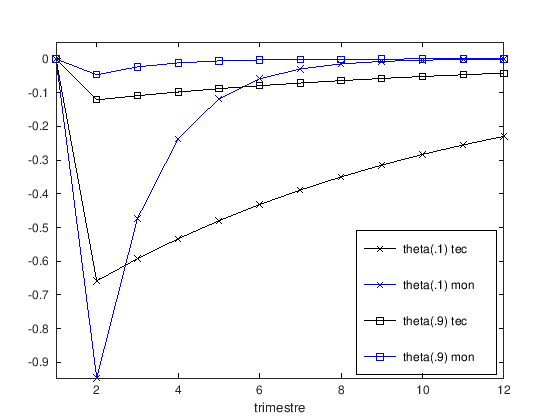

In [220]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.piano_epsilona],'k-x',
     [0,df2.irf1.piano_epsilonm],'b-x',
     [0,df1.irf1.piano_epsilona],'k-s',
     [0,df1.irf1.piano_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','southeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 12])
ylim([min([df2.irf1.piano_epsilona,df2.irf1.piano_epsilonm,df1.irf1.piano_epsilonm])
      max([df2.irf1.piano_epsilona,df2.irf1.piano_epsilonm,df1.irf1.piano_epsilonm]) + 0.05])



### Hiato do Produto (x)

Os choques reduziram o hiato do produto, torna-o mais negativo. Com outras palavras, o hiato do produto ($x_{t} = y-y_{t}$) se tornar mais negativo significa que o produto natural aumenta em relação ao produto real no período t.
Se apenas 10% das firmas reajustam preços a cada período (theta = 0.9), o efeito dos choques sobre o hiato do produto será muito maior. O efeito do choque tecnológico somado ao pouco reajuste de preços causa um efeito maior e mais persistente sobre o hiato.


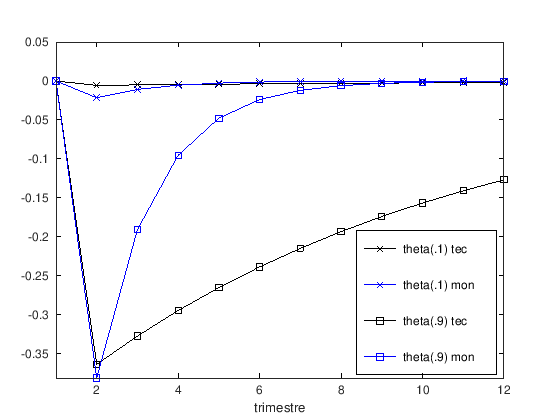

In [228]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.x_epsilona],'k-x',
     [0,df2.irf1.x_epsilonm],'b-x',
     [0,df1.irf1.x_epsilona],'k-s',
     [0,df1.irf1.x_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','southeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 12])
ylim([min([df2.irf1.x_epsilona,df2.irf1.x_epsilonm,df1.irf1.x_epsilonm])
      max([df2.irf1.x_epsilona,df2.irf1.x_epsilonm,df1.irf1.x_epsilonm]) + 0.05])

### Juros real (rano)

Na presença de choque monetário, independente do nível de reajuste de preços, a taxa de juros ira aumentar. O oposto irá ocorrer com o choque tecnológico. Na presença de rigidez de preços (poucas empresas fazendo reajustes, portanto, theta igual a 0.9) o efeito de um choque monetário é muito maior do que na ausência de rigidez.

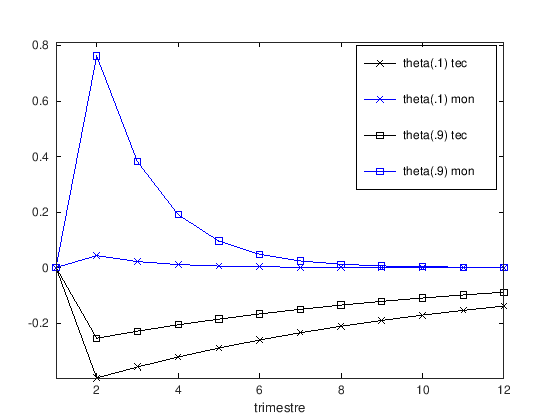

In [222]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.rano_epsilona],'k-x',
     [0,df2.irf1.rano_epsilonm],'b-x',
     [0,df1.irf1.rano_epsilona],'k-s',
     [0,df1.irf1.rano_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','northeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 12])
ylim([min([df2.irf1.rano_epsilona,df2.irf1.rano_epsilonm,df1.irf1.rano_epsilonm])
      max([df2.irf1.rano_epsilona,df2.irf1.rano_epsilonm,df1.irf1.rano_epsilonm]) + 0.05])

### Juros nominal (iano)

A reação do juros nominal é similar à reação do juros real. Uma diferença significativa surge apenas na presença de choque monetário e baixa rigidez de preços. Nesse caso a taxa de juros nominal se comporta de maneira diferente daquela observada para a taxa de juros real. Ao invés da taxa subir ela cai. 

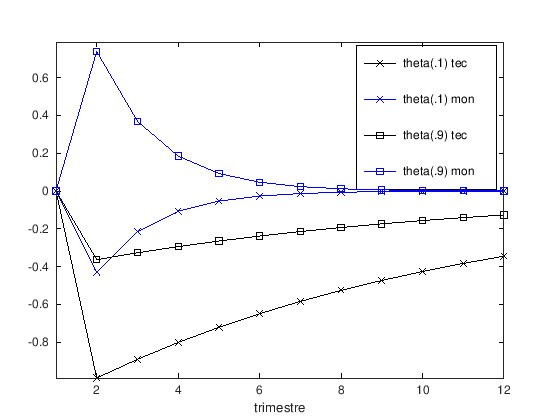

In [223]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.iano_epsilona],'k-x',
     [0,df2.irf1.iano_epsilonm],'b-x',
     [0,df1.irf1.iano_epsilona],'k-s',
     [0,df1.irf1.iano_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','northeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 12])
ylim([min([df2.irf1.iano_epsilona,df2.irf1.iano_epsilonm,df1.irf1.iano_epsilonm])
      max([df2.irf1.iano_epsilona,df2.irf1.iano_epsilonm,df1.irf1.iano_epsilonm]) + 0.05])

### Crescimento monetário (mg)

$$mg=4[y-y_{t-1}-etah*(i-i_{t-1})+pi]$$

É de se esperar que o choque monetário cause aumento de oferta de moeda, o que é verdade em ambos os casos, tanto com rigidez de preços quanto na ausência. No entanto, para o caso de regidez de preços, isso só sera verdade após o primeiro trimestre. 
Choques tecnológicos causam efeito similar na oferta de moeda, independente do nível de rigidez dos preços. Inicialmente há uma expanção da moeda e, logo após o segundo trimestre o crescimento monetário volta para seu comportamento normal.

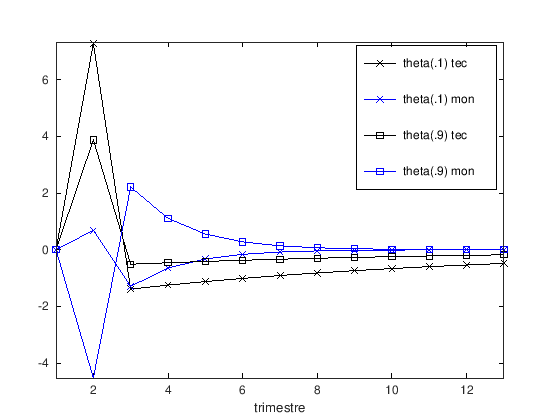

In [232]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.mg_epsilona],'k-x',
     [0,df2.irf1.mg_epsilonm],'b-x',
     [0,df1.irf1.mg_epsilona],'k-s',
     [0,df1.irf1.mg_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','northeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 13])
ylim([min([df2.irf1.mg_epsilona,df2.irf1.mg_epsilonm,df1.irf1.mg_epsilonm])
      max([df2.irf1.mg_epsilona,df2.irf1.mg_epsilonm,df1.irf1.mg_epsilonm]) + 0.05])

### Horas trabalhadas (l)

Talvez essa seja a variável mais fácil de ser analizada na presença de choque tecnológico. Aumento tecnológico invariavelmente ira causar redução de horas trabalhadas. A questão principal é a riferença dos resultados dosmodelos com e sem rigidez de preços. No cenário em que as firmas podem ajustar seus preços mais livremente a redução do número de horas trabalhadas, decorrente do choque, é muito maior do que em um cenário com rigidez.

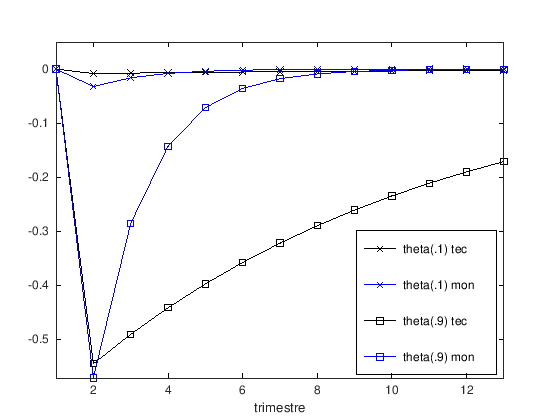

In [229]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.l_epsilona],'k-x',
     [0,df2.irf1.l_epsilonm],'b-x',
     [0,df1.irf1.l_epsilona],'k-s',
     [0,df1.irf1.l_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','southeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 13])
ylim([min([df2.irf1.l_epsilona,df2.irf1.l_epsilonm,df1.irf1.l_epsilonm])
      max([df2.irf1.l_epsilona,df2.irf1.l_epsilonm,df1.irf1.l_epsilonm]) + 0.05])

### Choque de política monetária (m)

O choque monetário é representado por um erro padrão de 0.25%


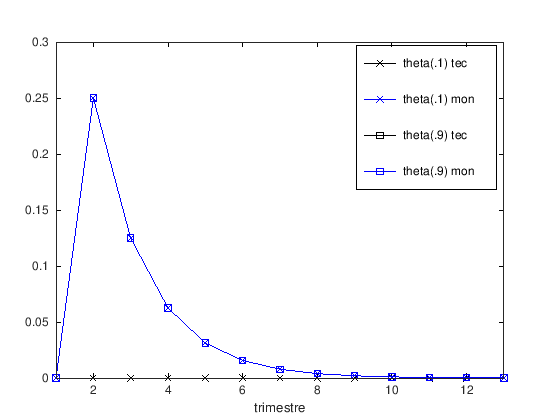

In [230]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.m_epsilona],'k-x',
     [0,df2.irf1.m_epsilonm],'b-x',
     [0,df1.irf1.m_epsilona],'k-s',
     [0,df1.irf1.m_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','northeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 13])
ylim([min([df2.irf1.m_epsilona,df2.irf1.m_epsilonm,df1.irf1.m_epsilonm])
      max([df2.irf1.m_epsilona,df2.irf1.m_epsilonm,df1.irf1.m_epsilonm]) + 0.05])

### Choque de tecnologia (a)

O Choque tecnológico é representado por um erro padrão de 1%


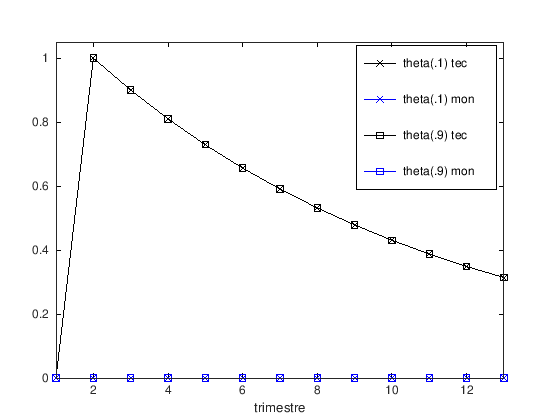

In [231]:
#Ajustar janela do gráfico
h = figure;
set (h,'defaultaxesposition', [0.1, 0.1, 0.8, 0.8]) #inches
#gerar grafico
df1 = load("modelo1_responses.mat");
df2 = load("modelo2_responses.mat");
plot([0,df2.irf1.a_epsilona],'k-x',
     [0,df2.irf1.a_epsilonm],'b-x',
     [0,df1.irf1.a_epsilona],'k-s',
     [0,df1.irf1.a_epsilonm],'b-s') #r-^ b-o r-x
legend({'theta(.1) tec','theta(.1) mon','theta(.9) tec','theta(.9) mon'} ,'Location','northeast','Orientation','vertical')
xlabel('trimestre')
xlim([1 13])
ylim([min([df2.irf1.a_epsilona,df2.irf1.a_epsilonm,df1.irf1.a_epsilonm])
      max([df2.irf1.a_epsilona,df2.irf1.a_epsilonm,df1.irf1.a_epsilonm]) + 0.05])

## Bibliografia

Galí, Jordi. 2015. Monetary Policy, Inflation, and the Business Cycle: An Introduction to the New Keynesian Framework and Its Applications, second edition, Princeton University Press.

https://archives.dynare.org/DynareWiki/ModelLatexOutput

https://git.dynare.org/Dynare/dynare/tree/master/examples

https://www3.nd.edu/~esims1/using_dynare_sp12.pdf

http://www.nviegi.net/research/dsge.htm

https://pypi.org/project/pynare/

https://alisdairmckay.com/Notes/HetAgents/index.html

https://www.dynare.org/manual.pdf

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html